<a href="https://colab.research.google.com/github/zulfiqaralimir/Financial-Econometrics/blob/master/NON_PARAMETRIC_REGRESSION_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## FINANCIAL ECONOMETRICS
MODULE 2 | LESSON 4

---

# **NON-PARAMETRIC REGRESSION**



|  |  |
|:---|:---|
|**Reading Time** | 60 minutes |
|**Prior Knowledge** | Weighted Least Square Regression, Robust Regression  |
|**Keywords** |Non-Parametric Regression, Local Averaging, Local Regression, Locally Weighted Regression,<BR> LOESS (or LOWESS), Focal Point, Span, Kernel Function, Tricube Function,<BR> Leave-One-Out Cross Validation |


---

*We discussed penalized regression in our last lesson with a large number of independent variables in a regression model. With many independent variable models, it is easy to have a multicollinearity issue, and it violates one of the ordinary least square regression (OLS) assumptions. In this lesson, we are looking into a violation of another assumption: linear dependence between the dependent variable and independent variables. When the relationship between the dependent variable and independent variables is not linear, we cannot use OLS regression to understand the relationship. We need a new method to investigate the relationship. In this lesson, we will introduce non-parametric regression. Non-parametric regression allows us to study the relationship of the dependent variable and independent variables when their relationship is not linear and usually unknown.*



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://drive.google.com/file/d/1TRkygtpiR6zFaMqmcnyXWuMbFWrhqiIx/view?usp=sharing

In [2]:
# Navigate to your file location in Google Drive
import pandas as pd

import pandas as pd

file_id = '1TRkygtpiR6zFaMqmcnyXWuMbFWrhqiIx'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)
df.head()

,Date,DXY,METALS,OIL,US_STK,INTL_STK,X13W_TB,X10Y_TBY,EURUSD,YEAR
0,1/4/2016,0.002433,0.024283,-0.007559,-0.013980,-0.019802,0.047297,-0.010577,-0.007316,2016
1,1/5/2016,0.005361,-0.004741,-0.021491,0.001691,-0.001263,0.322581,0.001336,-0.002436,2016
2,1/6/2016,-0.002213,0.013642,-0.055602,-0.012614,-0.015171,0.000000,-0.031584,-0.006978,2016
3,1/7/2016,-0.009679,0.035249,-0.020606,-0.023992,-0.019255,-0.073171,-0.011024,0.002512,2016
4,1/8/2016,0.003258,-0.028064,-0.003306,-0.010977,-0.010471,0.000000,-0.010683,0.013636,2016


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

lowess_sm = sm.nonparametric.lowess
from supersmoother import SuperSmoother

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width
# Note that supersmoother was pre-installed from !pip install --index-url https://pypi.org/simple supersmoother

In [7]:
# Import data
data_set_r_working = pd.read_csv("M2. module_2_data.csv")

## **1. Non-Parametric Regression**

Up until the last lesson, we assumed that the dependent variable and independent variables have a linear relationship. A linear regression model with coefficients provides a good model structure. A linear model is also easy to interpret, which makes it easier to understand the impact of independent variables on the dependent variable. We can also use the model to conduct various statistical inference. This structure is called **parametric regression**.

However, it is not always that a dependent variable has a linear relationship with independent variables. Sometimes, we can use variable transformation to convert the dependent variable or independent variables to have a linear relationship. Sometimes, we cannot. We need a method for analysis in which we don't need to make assumptions about the linear relationship of the variables. This is when non-parametric regression comes into play. **Non-parametric regression** breaks up the data in small groups to be analyzed and then combines all results from the small data groups to form conclusions about the data overall. Non-parametric regression does not require any prior assumptions about the relationship between the dependent variable and independent variable(s).


**Figure 1: Parametric Regression vs. Non-Parametric Regression**

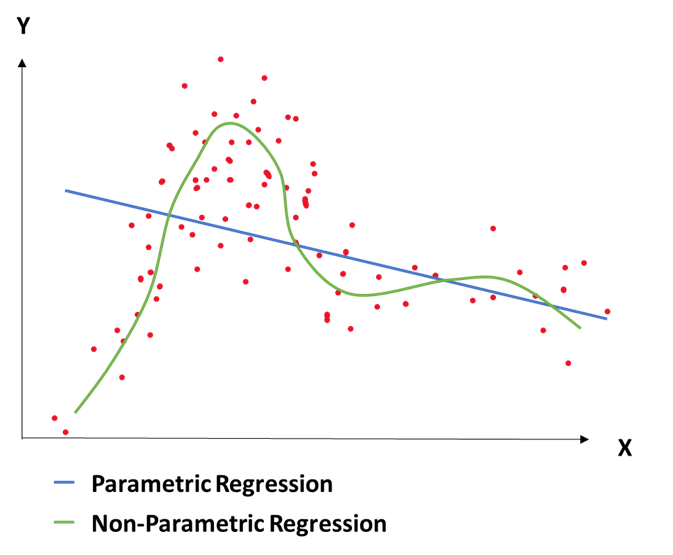


Figure 1 shows a linear regression line (parametric regression) and a non-parametric regression curve for the same dataset. We can see the non-parametric regression curve generally traces the data points better than the linear regression line in this example. We are also not sure what the relationship between $X$ and $Y$ is from the scatter plot. Given that the parametric regression does not seem to capture the overall curvy movement of the data, we can try to apply non-parametric regression in this case.

There are several methods of non-parametric regression. In this lesson, we will go through two classic non-parametric regression methods: local averaging and locally weighted regression (LOESS).


## **2. Local Averaging**

It is best to use an example to explain the local averaging method. Let's assume we have a dependent variable $Y$ and an independent variable $X$. The concept of local averaging is as follows:

For a data point $A(x,y)$ in the dataset, find some nearby data points around data point $A$, and calculate the average of $y$ values from data point $A$ and nearby data points. This average $y$ serves as the predicted $y$ for the $x$ from $A$. We repeat the same steps for all data points in the dataset. Then, we connect all predicted y values to form a local averaging curve.

Let's use Figure 2 to go through the detailed steps to derive a local averaging curve.


### **2.1 How Do We Select Nearby Points? M-Near Neighbor Method**

**Figure 2: $X$ and $Y$ Scatter Plot**

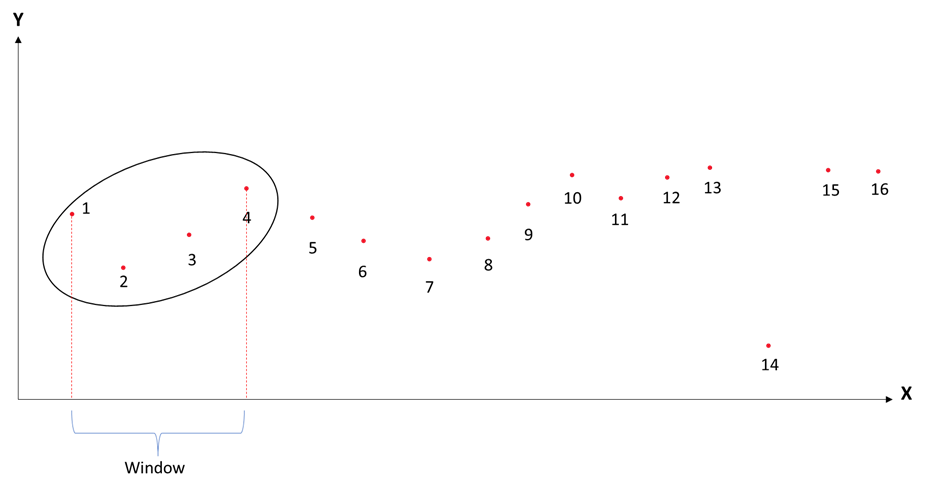


In Figure 2, we have assigned a number to each data point so we can easily refer to a specific data point later. Let's choose data point 1 as the focal point. A **focal point** is a data point we choose as the base point to find nearby data points for analysis. How do we choose nearby data points for local averaging? We have 16 data points in this plot. We can pick a fraction of them to be included in local averaging. For now, let's choose four data points, including the focal point. Our selected points constitute 0.25 (4/16) of the total data points. This fraction is called a **span**. A **span** is a fraction that represents the number of selected data points divided by the total number of data points in the dataset. We can use span to calculate how many data points we decide to use for local averaging. We will discuss how to choose a span level later.

Once we decide how many data points to choose, we need to have a rule for choosing them. For this example, we are using a span of 0.25, and we will choose four data points, including the focal point. How do we choose the other three nearby data points? We choose the data points that are closest to the focal point in terms of their distance on the $X$-axis. In the graph, we can see that data points 2, 3, and 4 are closest to focal point 1 according to their distances from focal point 1 on the $X$-axis. Hence, we have focal point 1 and data points 2, 3, and 4 to calculate local averaging. With these four data points, we create a frame along the $X$-axis to enclose these four points. We call this frame a **window**. This method of choosing data points for local analysis is called the **m-nearest neighbor method**. In our example, we select four points, so $m$ is $4$. We will also use the same data selection method in the following section.


### **2.2 Calculate Local Averages**

Now we know how to select nearby data points to calculate the local average for each data point. In Figure 3, we see that five focal points and their selected data points are used to calculate local averages. For the local average number for focal point 1, we calculate the average of $y$ values ($\bar{y}$) from selected data points (data points 1, 2, 3, and 4). The predicted data point for focal point 1 is $(x, \bar{y})$. We then draw this predicted data point on the plot. In Figure 4 (below), the red dot with 1 is focal point 1, and the purple + sign near it is the predicted data point for focal point 1. We then repeat the same procedure for focal point 2 and so on until we finish all focal points in the dataset. In our case, the last focal point is data point 16.

We can see from Figure 3 that data point 1 and data point 2 actually have the same selected data points to calculate local averages. This is because for a focal point on the data boundary, its data point choices are limited to only one side of its location. Consequently, the data point choices are more likely to overlap with the next focal point. Due to this situation, the local average curve is usually flat near both ends of the data point boundaries.


**Figure 3: First Five Focal Points and Their Selected Data Points for Local Averaging**

|  Focal Point  |  Selected Data Points <br> for Local Averaging  |
|  :---:  |  :---:        |
|   1   | 1, 2, 3, 4  |
|   2   | 1, 2, 3, 4  |
|   3   | 2, 3, 4, 5  |
|   4   | 3, 4, 5, 6  |
|   5   | 4, 5, 6, 7  |




**Figure 4: Original Data Points and Predicted $Y$ Values from Local Averaging**

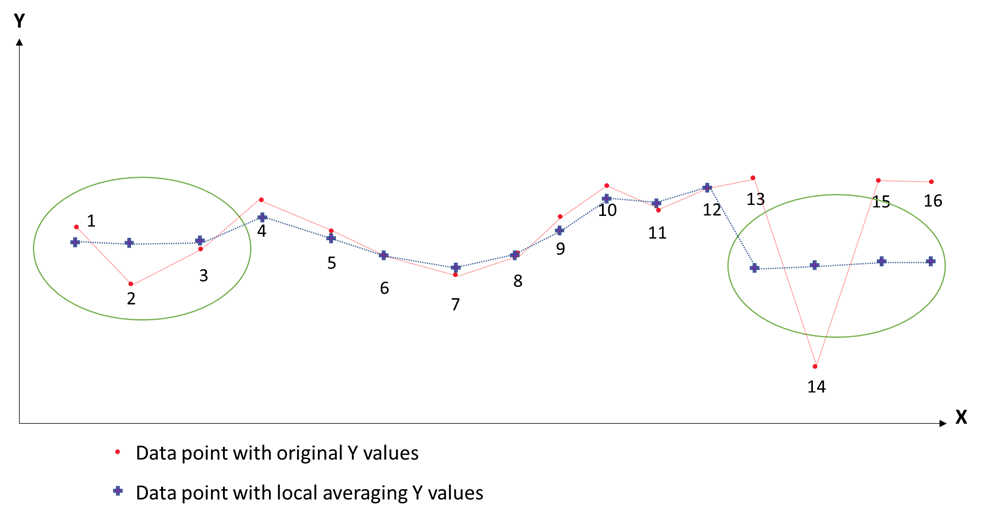


Now let's draw out all local average $y$ values on the $X-Y$ scatter plot to form a local average curve. The curve is shown in Figure 4. In Figure 4, we can see the local average curve (purple line) is smoother than the curve from the original data points (red curve). We also see that both ends of the local average curve are flat because of the boundary data points issue we mentioned above.

Another issue we can see is from data point 13, the local average curve suddenly drops and stays at a lower level. This is because data point 14 is an outlier. Data point 14 is included in the local average calculation for data points 13, 14, 15, and 16, and therefore, all their average $y$ values are lower.

The local averaging method is fairly simple. However, it has the two problems we mentioned above: The curve tends to be flat on both ends, and the curve can be distorted by the existence of outliers. The next method we are going to introduce will correct these issues.


### **2.3 How Do We Choose a Span Level for Local Averaging?**

There are several ways to select a span level for local averaging. The first one is to draw several local average curves with different span levels and pick the one that not only captures the data's general curvy movement but also has a smooth pattern.

The more formal method is to use leave-one-out cross validation. The idea of leave-one-out cross-validation is similar to $k$-fold cross-validation. Instead of creating $k$ groups, leave-one-out cross validation takes one data point out as the holdout set, calculates local averages with the given span level for the training set, and calculates the sum of squared residuals. Then, you repeat the same process with a different holdout point until all data points have been treated as a holdout point. You then calculate the average sum of squared residuals. This is the average sum of squared residuals for this given span level. You then repeat the whole process with another span level. After collecting enough data from several iterations as described above, you will get several pairs of span level and the average sum of squared residuals. You can use this information to find the optimal span level that minimizes the average sum of squared residuals.

Most statistical applications can conduct leave-one-out cross-validation for you automatically. Please check the application you use for details.


## **3. Locally Weighted Regression**

Locally weighted regression is another non-parametric regression that is aimed to control the issues we discussed in the local averaging section.

### **3.1 Overview of Local Regression and Local Weighted Regression**

In last section, we talked about using $m$-near neighbor method to create small data groups around focal points to run local averaging. We will use the same $m$-near neighbor method to select nearby data points around a focal point for local regression. Instead of calculating the average of $y$ values from selected data points in local averaging, we will run a regression on the selected data point to get the predicted $y$ value for the focal point. This regression method is called **local regression**. We repeat the same process across all the datapoints until all data points have been treated as a focal point. Then, we create a local regression curve by connecting all predicted $y$ values from each local regression model. If we weight all the selected data points in a window and run a local regression, this regression is called **locally weighted regression**. We will follow the same logic as above to create a locally weighted regression curve. This is the basic concept of locally weighted regression. Now, let's go through each step to generate a locally weighted regression curve in detail.


### **3.2 Basics of Locally Weighted Regressions**

**Figure 5. X and Y Scatterplot**

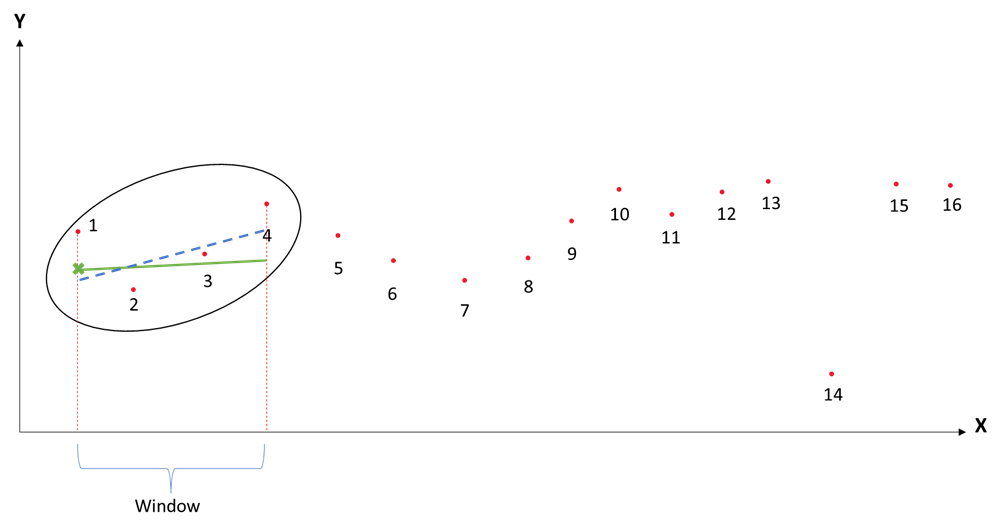


Let's continue to use focal point 1 and 4 to explain locally weighted regression. Figure 5 shows these data points in the $X-Y$ scatter plot. Before running a regression for the selected data points, we need to weight each data point. How? We weigh each data point by how close they are to the focal point. The closer a point is to the focal point, the more it is weighted. The farther away a point is from the focal point, the less it is weighted. The next point with the shortest distance on the $X$-axis from the focal point gets the second highest weight. The point that is furthest away from the focal point in terms of distance on the $X$-axis will get the smallest weight. In our example, focal point 1 gets the highest weight, followed by data point 2, and then data point 3. Data point 4 gets the lowest weight. Once we find the weights for each data point, we will use the weighted least square method to run the regression.

How do we get the weight for each data point? We us a function called kernel function. A **kernel function** gives the largest weight to the observations closest to the focal point and reduces the weight as the distance between an observation and the focal point grows. There are several kernel functions to choose from, but one popular choice is the **tricube function**:

$$
K (z_{i}) = \begin{cases}
  (1 - | z_{i}|^{3})^{3},  & \text{ if } |z_{i}| < 1 \\
  0,  & \text{ if } |z_{i}| \geq 1
\end{cases}
$$

Where $z_{i} = \frac{ X_{i} - X_{\text{focal point}} }{h}$  and $h$ is the width of the window

Now we can use the weights from the kernel function to estimate locally weighted regression. Our weighted least square objective function is as follows:

$$
\sum_{i=1}^{4}  k (z_{i}) (Y_{i} - \beta _{0} - \beta _{1}  X_{i})^{2}
$$

In Figure 5, the green solid line is the locally weighted regression line. The blue dotted line is from an OLS regression. We can see the locally weighted regression line is flatter compared to the OLS line because it gives less weight to data point 4. From the locally weighted regression, we can obtain the predicted $y$ value for focal point 1 from the model. It is marked as the green cross in Figure 1.

We will now move on to assign data point 2 as the focal point and repeat the whole process in order to get the predicted $y$ value for focal point 2. In Figure 3 below, we show the first five focal points in the graph and their corresponding data points for running a locally weighted regression.


**Figure 6: First Five Focal Points and Their Corresponding Data Points for Locally Weighted Regression**

| Focal Point | Selected Data Points for <br>  Locally Weighted Regression |
| :---: | :---: |
|   1   | 1, 2, 3, 4 |
|   2   | 1, 2, 3, 4 |
|   3   | 2, 3, 4, 5 |
|   4   | 3, 4, 5, 6 |
|   5   | 4, 5, 6, 7 |



We can see for focal point 1 and focal point 2, the same data points are selected for locally weighted regression. This is the same situation in local averaging. However, data points in the focal point 1 group will receive different weights compared to the weights in focal point 2 for locally weighted regression. The same data point will have a different distance on the $X$-axis to the focal point in different focal point windows. This is critical for locally weighted regression: Because weight changes as the focal point changes, you don't get the same locally weighted regression from focal point 1 and focal point 2. This makes locally weighted regression different from local averaging. In local averaging, data points in the focal point 1 group and focal point 2 group receive the same weights, so the averages of $y$ values are the same. In locally weighted regression, the same data point in different focal point groups will receive different weights. Locally weighted regression can correct the flattening curve issue near the data boundary in local averaging.

Once we conduct locally weighted regression for each point in the dataset, we can obtain the predicted $y$ value for each data point.


**Figure 7: Original Data Points and Predicted Values from Locally Weighted Regression**

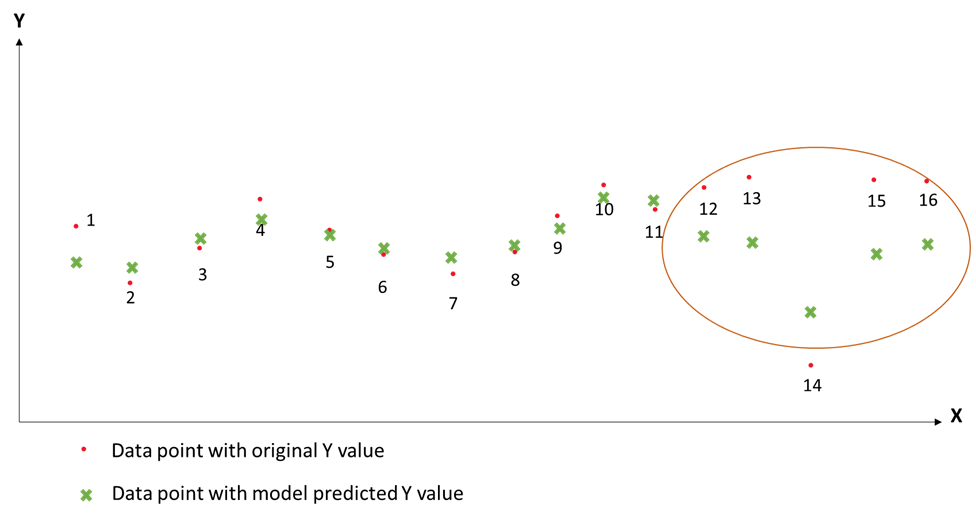


Figure 7 shows the data points with the original $y$ values and their predicted $y$ values from locally weighted regression. We can see the data points with predicted $y$ values form a smoother pattern than the data points with the original $y$ values. However, for data points 12, 13, 14, 15, and 16, the predicted $y$ values all got pulled down from the original $y$ values. This is because the locally weighted regression for these data points involves data point 14, which is an outlier.


### **3.3 Handle Outliers for Locally Weighted Regression**

So how do we handle the issue of outliers in locally weighted regression? We apply the robust regression technique we learned from Lesson 2 to handle the outlier issue. Once we get all the predicted $y$ values for all data points in the dataset, it is common to run the $m$-estimation bisquare method on the predicted data points (original $x$ and predicted $y$) to mitigate outlier impact on the predicted curve. We usually run robust regression a couple of times to make sure the smooth curve is stable.


**Figure 8: Locally Weighted Regression without Robust Regression and with Robust Regression**

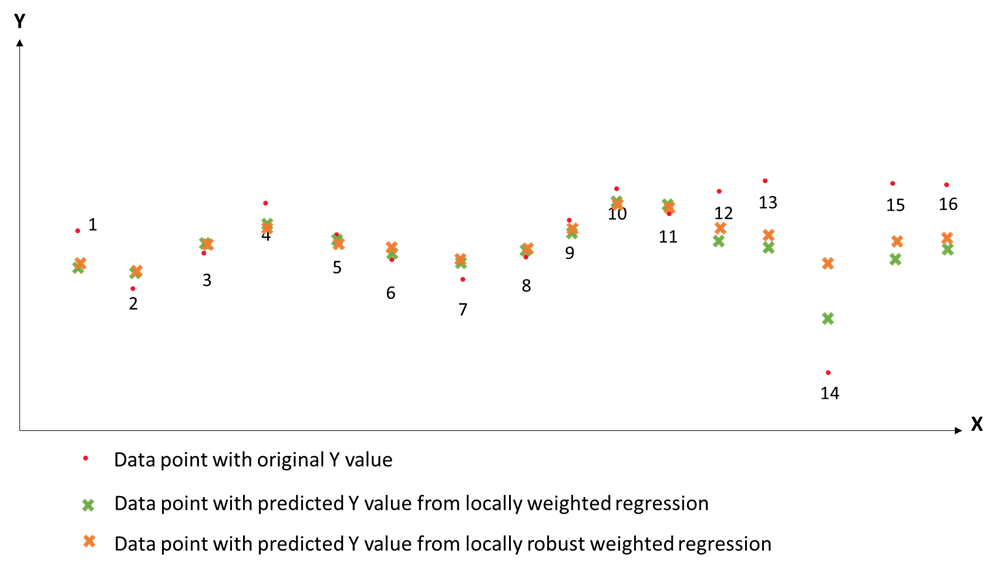


From Figure 8, we can see the curve formed by the data points from locally robust weighted regression (the orange crosses) is even smoother than the curve from locally weighted regression (the green crosses).


### **3.4 Locally Weighted Polynomial Regression**

In the last section, we assumed our locally weighted regression objective function to be a simple linear regression as follows:

$$ \sum_{i=1}^{4}  k (z_{i} ) (Y_{i} - \beta_{0} - \beta_{1} X_{i})^{2} $$

There is another option for the objective function. Instead of a linear formula, we can also use a polynomial formula as follows:

$$ \sum_{i=1}^{4}  k (z_{i}) (Y_{i} - \beta_{0} - \beta_{1}  X_{i} - \beta_{2}  X_{i}^{2} - ... - \beta_{p} X_{i}^{p} )^{2} $$

If we choose a degree of two for the polynomial formula, the objective function will be as follows:

$$ \sum_{i=1}^{4}  k (z_{i}) (Y_{i} - \beta_{0} - \beta_{1} X_{i} - \beta_{2} X_{i}^{2} )^{2} $$

When we use a locally weighted polynomial regression with a degree of two to run the model, we use a method called **LOESS: locally weighted scatterplot smoothing**. LOESS has an old name called LOWESS, as LOWESS is an older version of LOESS. In some statistical applications, you might find both LOESS and LOWESS available. Although they are the same method, some applications will have different default settings for LOESS and LOWESS that would make model results on the same dataset different. For example, R has both LOESS and LOWESS. LOWESS can only run locally weighted **linear** regression while LOESS can run both locally weighted linear regression and locally weighted polynomial regression. In R, the default setting for LOESS is locally weighted polynomial regression with a degree of two. Please check your statistical application for model specification.


### **3.5 How Do We Choose Span?**

Span in locally weighted regression has the same meaning as in local averaging. Span is the ratio of the number of data points used to run a locally weighted regression to the total number of data points in the dataset. Span has a value between $0$ and $1$. If the span is too small, the local regression will use fewer data points. The fit will be more accurate for the data points in the regression. However, the local regression results among different windows will be very different, creating more variance among different local regression lines. The curve will be wigglier if the span is small. When the span is too big, you include more data for a local regression. The fit will be less accurate for data points in the regression since there are more data points in the local regression now. However, the local regressions among different windows will be more similar, resulting in less variance. The curve will also be a lot smoother. Therefore, it is important to find a span that balances the variance and bias.

As for finding a good span number, the common practice is to use visual inspection. You can draw LOESS with various span levels and pick the one that balance the smoothness of the curve and the prediction of the data.

The formal method to choose the optimal span is also similar to local average. Leave-one-out cross-validation is widely available in most statistical applications. Another similar cross-validation method called generalized cross validation is also a good choice and is also available in many applications. Leave-one-out cross-validation and generalized cross-validation (GCV) are more rigorous in finding an optimal span. Choose the method that is available in the application you decide to use.


### **3.6 Pros and Cons of LOESS**

LOESS is a popular non-parametric method. First of all, you don't need to have any assumptions about the relationship between a dependent variable and an independent variable. It is also very easy to implement in any statistical software.

However, unlike least square regressions, LOESS doesn't produce coefficients. It is hard to interpret the model results and use the model output to run statistical inference. Another issue is if the dataset is not large enough, LOESS will not produce a satisfactory result. LOESS needs enough data points to run locally weighted regressions to make sense of the whole model.

Not having enough data also makes the tail of the LOESS curve less accurate. This is because in the locally weighted regression method, the regressions near both ends of the dataset usually have fewer data points than the regressions in the middle of the dataset. Hence, if the dataset is not large enough, the tail of the dataset will have less accurate regressions.


## **4. Foreign Exchange Market and Non-Parametric Regression**

Now, let's use local averaging and LOESS on our U.S. Dollar Index example. We will still use U.S. 10-Year Treasury Bond Yield daily return as the independent variable and U.S. Dollar Index daily return as the dependent variable.


**Figure 9: U.S. Dollar Index Daily Return vs. U.S. 10-Year Treasury Bond Daily Return Scatter Plot and LOESS with Various Spans**
<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

In [ ]:
# Compute a lowess smoothing of the data at 0.20, 0.35 and 0.75 span values
smoothed20 = lowess_sm(
    endog=data_set_r_working.DXY, exog=data_set_r_working.X10Y_TBY, frac=0.20, it=4
)
smoothed35 = lowess_sm(
    endog=data_set_r_working.DXY, exog=data_set_r_working.X10Y_TBY, frac=0.35, it=4
)
smoothed75 = lowess_sm(
    endog=data_set_r_working.DXY, exog=data_set_r_working.X10Y_TBY, frac=0.75, it=4
)

# Plot the fit lines
plt.errorbar(data_set_r_working.X10Y_TBY, data_set_r_working.DXY, fmt="o", alpha=0.7)
plt.plot(smoothed20[:, 0], smoothed20[:, 1], c="g", label="LOESS span level 0.20")
plt.plot(smoothed35[:, 0], smoothed35[:, 1], c="r", label="LOESS span level 0.35")
plt.plot(smoothed75[:, 0], smoothed75[:, 1], c="b", label="LOESS span level 0.75")
plt.xlabel("US 10 Year Treasury Bond Yield Daily Return")
plt.ylabel("US Dollar Index Daily Return")
plt.legend()
plt.show()

In figure 9, there are 3 different LOESS curves with the span levels 0.20, 0.35, and 0.75. The red curve has a span level of 0.35, which is the optimal span derived from generalized cross validation. We can see that the red curve is better than the blue line as the red curve captures more data movement. The red curve is also better than the green curve as the red curve is not too wiggly compared to the green curve.


**Figure 10: U.S. Dollar Index Daily Return vs. U.S. 10-Year Treasury Bond Daily Return Scatter Plot and LOESS and Local Averaging Curves**


In [ ]:
# DXY vs X10Y_TBY scatter plot and LOESS and Local Averaging Curves

# Find the smoothed fit using the Friedman's SuperSmoother model
model = SuperSmoother(alpha=None, period=None, final_span=0.138)
model.fit(
    data_set_r_working.X10Y_TBY,
    data_set_r_working.DXY,
    np.ones(len(data_set_r_working.DXY)),
)  # t, y, dy
fit_DXY = model.predict(data_set_r_working.X10Y_TBY)

# The smoothed model of the data
temp_data = pd.DataFrame([data_set_r_working.X10Y_TBY, fit_DXY]).T
temp_data.columns = ["fit_DXY", "X10Y_TBY"]
temp_data = temp_data.sort_values(by="fit_DXY")

# Plot scatter plot, optimal LOESS and Friedman's smoothed model
plt.errorbar(data_set_r_working.X10Y_TBY, data_set_r_working.DXY, fmt="o", alpha=0.7)
plt.plot(smoothed35[:, 0], smoothed35[:, 1], c="r", label="Optimal LOESS")
plt.plot(temp_data.fit_DXY, temp_data.X10Y_TBY, "-k", label="Friedman's SuperSmoother")

plt.title("Optimal LOESS vs Friedman's Local Averaging")
plt.xlabel("US 10 Year Treasury Bond Yield Daily Return")
plt.ylabel("US Dollar Index Daily Return")
plt.legend()
plt.show()

In figure 10, we compare LOESS and local averaging. We chose LOESS (red curve) with the optimal span from the last example. The local averaging curve (black curve) here has the optimal span derived from leave-one-out cross-validation. We can see these two curves trace each other pretty well except on the left end of the plot. The local averaging curve is slightly flatter than LOESS on the left end. This result confirms what we learned from the last section that a local averaging curve tends to get flat on both sides of the data boundaries.



## **5. Shiny Application Weighted Least Square Regression and Robust Regression**

In this module, we provide a Shiny application to build a weighted least square regression model and a robust regression model. The application also gives a data summary to let you know what variables are available in the application.

[Click here to access the application](https://worldquantuniversity.shinyapps.io/3FE-Module-2-Lesson-4/?_ga=2.191866089.2100839503.1660164825-1173458961.1656095235). Select a dependent variable, independent variable(s), and year(s) to run and then press the run button. The application will generate model results for a weighted least square regression model and a robust regression model at the same time.



## **6. Conclusion**

In this lesson, we learned that when the dependent variable and independent variables don't have a linear relationship, we use non-parametric regression to explore their relationship. We introduced local averaging and locally weighted regression. We went through the steps to derive both methods on an $X-Y$ scatter plot. We briefly talked about how to select an optimal span level. We then introduced LOESS, the most popular non-parametric regression method. In the end, we discussed the pros and cons of LOESS. The lesson ended with examples that generated a local average curve and several LOESS curves from our foreign exchange market data. This lesson concludes our exploration on regression analysis. We studied classic OLS regression and its assumptions. We then started to challenge those assumptions and introduced alternative regression methods to handle assumption violation. We used weighted least square regression when the variances of the error terms are not constant. We then introduced robust regression when there are outliers in the dataset. We applied penalized regression when we have high-dimensional data. Lastly, we learned Non-Parametric Regression when our dependent variable and independent variables don't have a linear relationship. In the next module, we will look at some variable distributions and their applications.


In [4]:
!pip install supersmoother

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for supersmoother: filename=supersmoother-0.4-py3-none-any.whl size=16146 sha256=e0977d569d055dbb7ab8c7b7ad86bc30f948ba3a63d78d81a185657b67c8a386
  Stored in directory: /root/.cache/pip/wheels/69/4a/ff/05c85ded597955df839bedebe6dca56297c2568c04881d2e70
Successfully built supersmoother
